# Үй жұмысы: 30000 Spotify Songs деректер жинағына EDA және Feature Engineering

**Тақырыбы:** Деректерді зерттеу, тазарту, визуализациялау және модельдеуге дайындау.

**Мақсаты:**
Студент осы жұмысты орындау арқылы Машиналық оқыту жобасының толық циклін қамтитын келесі дағдыларды меңгеруі керек:

1.  **Деректерді тазарту:** Бос мәндермен (Missing Values) және дубликаттармен жұмыс.
2.  **Ауытқуларды өңдеу:** Boxplot және IQR әдісі арқылы outliers-ті анықтау.
3.  **Визуализация:** Matplotlib және Seaborn көмегімен деректердің таралуын және корреляциясын зерттеу.
4.  **Feature Engineering:** Бар деректерден жаңа пайдалы белгілерді жасау.
5.  **Кодтау (Encoding):** Санаттық айнымалыларды (`sex`, `island`, `species`) сандық форматқа ауыстыру.
6.  **Шкалалау (Scaling):** Сандық деректерді бір масштабқа келтіру.

**Дереккөз:** `seaborn` кітапханасындағы кіріктірілген "penguins" деректер жинағы.

-----

## 1\. Кітапханаларды және деректерді жүктеу

Алдымен қажетті кітапханаларды импорттап, деректер жинағын жүктейміз.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# Визуализация параметрлерін орнату
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Деректер жинағын жүктеу
df = pd.read_csv('../data/spotify_songs.csv')

# Алғашқы 5 жолды және деректердің өлшемін шығару
print(f"Деректер өлшемі: {df.shape}")
df.head()

Деректер өлшемі: (32833, 23)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


-----

## 2\. Деректерді шолу және Тазарту (Data Cleaning)

Деректерді талдамас бұрын, олардың сапасын тексеріп, бос мәндерден тазартуымыз керек.

**Тапсырма:**

1.  `info()` әдісін қолданып, деректер типін тексеріңіз.
2.  Әр бағанда қанша бос мән (NaN) бар екенін анықтаңыз.
3.  **Стратегия:**
      * Сандық бағандардағы (`bill_length_mm`, `body_mass_g` т.б.) бос мәндерді **медианамен** толтырыңыз.
      * Санаттық бағандардағы (`sex`) бос мәндерді ең жиі кездесетін мәнмен (**mode**) толтырыңыз.

<!-- end list -->

In [7]:
# 1. Деректер туралы ақпарат (info)
# TODO: Кодыңызды осында жазыңыз
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [6]:
# 2. Бос мәндер санын тексеру
# TODO: Кодыңызды осында жазыңыз
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [2]:
# 3. Бос мәндерді толтыру
# Сандық бағандар үшін (цикл немесе жеке-жеке fillna қолданыңыз)
# TODO: Кодыңызды осында жазыңыз

df['track_name'].fillna('Unknown', inplace=True)
df['track_artist'].fillna('Unknown', inplace=True)
df['track_album_name'].fillna('Unknown', inplace=True)

In [3]:
# Тексеру: Бос мәндер қалмағанына көз жеткізіңіз
print(df.isnull().sum())

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


-----

## 3\. Ауытқуларды анықтау және өңдеу (Outlier Handling)

Кейде деректерде қате енгізілген немесе тым ерекше мәндер болады. Біз оларды IQR (Interquartile Range) әдісімен тазалаймыз.

**Тапсырма:**

1.  `flipper_length_mm` (қанат ұзындығы) бағаны үшін **Boxplot** сызыңыз.
2.  Осы баған үшін **IQR** есептеңіз (Q3 - Q1).
3.  Төменгі (lower bound) және жоғарғы (upper bound) шекті анықтаңыз.
4.  Осы шектен шығатын мәндерді алып тастаңыз (сүзгілеу).

<!-- end list -->

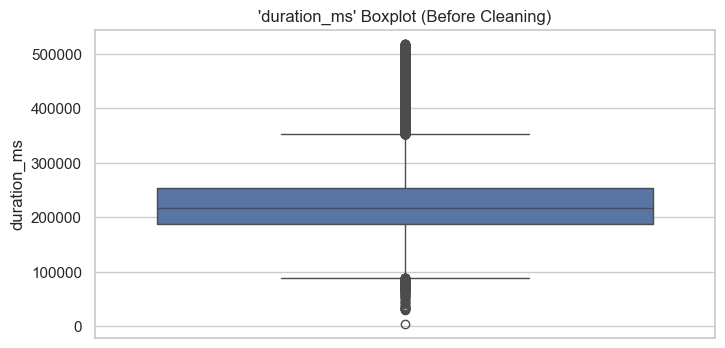

In [ ]:
# 1. Boxplot салу
plt.figure(figsize=(8, 4))
# TODO: Seaborn boxplot функциясын қолданыңыз
plt.title("'duration_ms' Boxplot (Before Cleaning)")
sns.boxplot(df['duration_ms'])
plt.show()

In [6]:
# 2. IQR және шектік мәндерді есептеу
# TODO: Q1 және Q3 есептеңіз
Q1 = df['duration_ms'].quantile(0.25)
Q3 = df['duration_ms'].quantile(0.75) 

# TODO: IQR есептеңіз
IQR = Q3 - Q1 

# TODO: lower_bound және upper_bound есептеңіз
lower_bound = Q1 - 1.5 * IQR 

upper_bound = Q3 - 1.5 * IQR

print(f"--- Параметры очистки для '{df['duration_ms']}' ---")
print(f"Q1: {Q1:.0f} ms")
print(f"Q3: {Q3:.0f} ms")
print(f"IQR: {IQR:.0f} ms")
print(f"Нижняя граница (Lower Bound): {lower_bound:.0f} ms")
print(f"Верхняя граница (Upper Bound): {upper_bound:.0f} ms")

--- Параметры очистки для '0        194754
1        162600
2        176616
3        169093
4        189052
          ...  
32828    204375
32829    353120
32830    210112
32831    367432
32832    337500
Name: duration_ms, Length: 32833, dtype: int64' ---
Q1: 187819 ms
Q3: 253585 ms
IQR: 65766 ms
Нижняя граница (Lower Bound): 89170 ms
Верхняя граница (Upper Bound): 154936 ms


In [11]:

# 3. Ауытқуларды алып тастау
# TODO: df айнымалысын жаңартып, тек шектік мәндер арасындағы деректерді қалдырыңыз
df_cleaned = df[(df['duration_ms'] >= lower_bound) & (df['duration_ms'] <= upper_bound)].copy()

print(f"Тазартылғаннан кейінгі деректер өлшемі: {df_cleaned.shape}")


Тазартылғаннан кейінгі деректер өлшемі: (2081, 23)


-----

## 4\. Визуализация (EDA)

Енді таза деректермен жұмыс істейміз. Графиктер арқылы заңдылықтарды іздеңіз.

**Тапсырма:**

1.  **Гистограмма:** `duration_ms` таралуын көрсетіңіз.
2.  **Нүктелік диаграмма (Scatter Plot):** `energy` (музыканын энергиясы) мен `loundless` (музыканын дауысынын каттылыгы) арасындағы байланысты көрсетіңіз. Түрлерді (`playlist_genre`) - (`hue`) арқылы ажыратыңыз.
3.  **Жылу картасы (Heatmap):** Барлық сандық айнымалылар арасындағы корреляция матрицасын құрыңыз және визуализациялаңыз.

<!-- end list -->

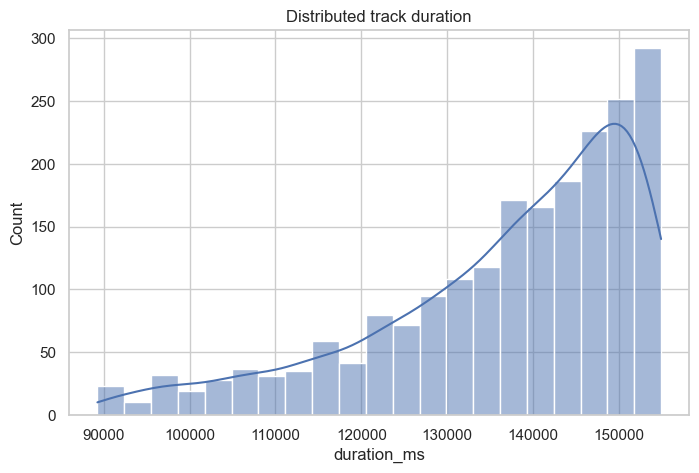

In [37]:
# 1. (Histogram)
plt.figure(figsize=(8, 5))
# TODO: sns.histplot қолданыңыз
sns.histplot(data = df_cleaned, x = 'duration_ms', kde=True)
plt.title('Distributed track duration')
plt.show()

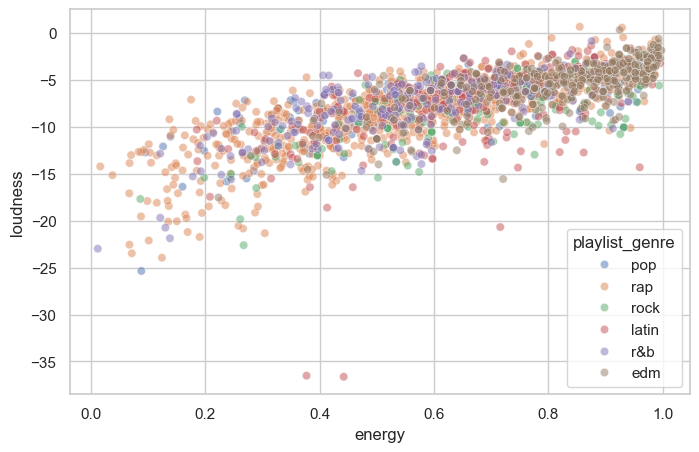

In [ ]:
# 2. Scatterplot: 
plt.figure(figsize=(8, 5))
# TODO: sns.scatterplot қолданыңыз
sns.scatterplot(data = df_cleaned, x = 'energy', y = 'loudness', hue='playlist_genre', alpha=0.5)
plt.title('Energy with Londness scatter plot')
plt.show()


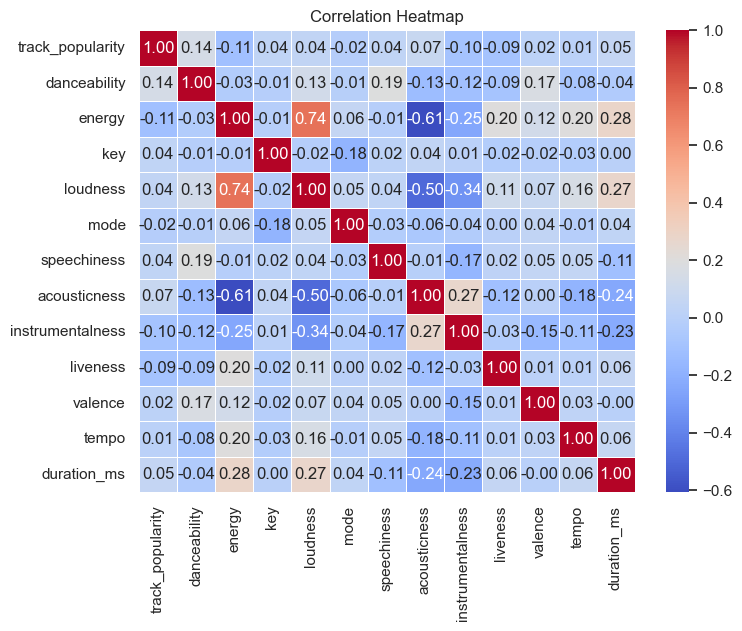

In [39]:
# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
# TODO: Тек сандық бағандарды таңдап, correlation matrix жасаңыз
df_numeric = df_cleaned.select_dtypes(include=['int64', 'float64'])

correlation_matrix = df_numeric.corr()
# TODO: sns.heatmap арқылы салыңыз
sns.heatmap(data = correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

-----

## 5\. Feature Engineering

Модель жақсы жұмыс істеуі үшін кейде жаңа белгілер (features) ойлап табу керек.

<!-- end list -->

In [26]:
# Жаңа feature жасау
# TODO: 
df_cleaned['genre_mean_popularity'] = df_cleaned.groupby('playlist_genre')['track_popularity'].transform('mean')

In [29]:
# Алғашқы 5 жолды тексеру
df_cleaned['genre_mean_popularity'].head()

42     48.724324
46     48.724324
57     48.724324
104    48.724324
126    48.724324
Name: genre_mean_popularity, dtype: float64

In [30]:
df_cleaned['popularity_diff'] = df_cleaned['track_popularity'] - df_cleaned['genre_mean_popularity']

In [31]:
df_cleaned['popularity_diff'].head()

42     13.275676
46      7.275676
57     18.275676
104    23.275676
126    -9.724324
Name: popularity_diff, dtype: float64

-----

## 6\. Санаттық белгілерді кодтау (Encoding)

Компьютер сөздерді түсінбейді, сондықтан `island`, `sex`, `species` сияқты сөздік бағандарды сандарға айналдырамыз.

**Тапсырма:**

1.  `species` (біз болжайтын нысана) үшін **Label Encoding** қолданыңыз (0, 1, 2 қылып өзгертеді).
2.  `island` және `sex` үшін **One-Hot Encoding** (`pd.get_dummies`) қолданыңыз. `drop_first=True` параметрін ұмытпаңыз.

<!-- end list -->

In [42]:
# 1. Label Encoding (species)
le = LabelEncoder()
# TODO: 
df_cleaned['genre_encoded'] = le.fit_transform(df_cleaned['playlist_genre'])

# 2. One-Hot Encoding (island, sex)
# TODO:
df_encoded = pd.get_dummies(df_cleaned, columns=['playlist_genre'])


In [43]:
# Нәтижені көру
df_cleaned['genre_encoded'].head()

42     2
46     2
57     2
104    2
126    2
Name: genre_encoded, dtype: int64

-----

## 7\. Шкалалау (Scaling)

Соңғы қадам – сандық деректерді бір өлшемге келтіру. Мысалы, салмақ 5000 грамм болса, тұмсық ұзындығы 50 мм. Бұл айырмашылық модельге кедергі келтіруі мүмкін.

**Тапсырма:**

  * `StandardScaler` көмегімен барлық сандық белгілерді (`bill_length_mm`, `body_mass_g`, `bill_ratio` т.б.) шкалалаңыз.

<!-- end list -->

In [44]:
scaler = StandardScaler()

num_cols = [
    'track_popularity', 'danceability', 'energy', 'key', 
    'loudness', 'mode', 'speechiness', 'acousticness', 
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
]

# TODO: fit_transform қолданыңыз және df_cleaned ішіндегі бағандарды жаңартыңыз

df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

print("Данные после шкалирования:")
print(df_cleaned[num_cols].head())

Данные после шкалирования:
     track_popularity  danceability    energy       key  loudness      mode  \
42           0.812320     -0.105964  1.333475 -0.626737  1.065600 -1.116826   
46           0.538084      0.702437  1.172145  1.280045  0.873308 -1.116826   
57           1.040851      0.309161 -0.639364  0.735251 -1.020379  0.895395   
104          1.269381      0.301878  0.250257 -1.443929  0.296981  0.895395   
126         -0.238919     -1.882989  1.282771  1.007648  1.078437 -1.116826   

     speechiness  acousticness  instrumentalness  liveness   valence  \
42     -0.673214     -0.799896         -0.573666 -0.322347  0.680143   
46      0.175680     -0.713738         -0.573767  0.198734 -0.364222   
57     -0.740624      0.610517         -0.573673 -0.409194 -1.565448   
104    -0.858199     -0.589085         -0.573767  1.000397  0.213688   
126    -0.644996      0.192562         -0.573713  0.653010  0.510899   

        tempo  duration_ms  
42  -0.156200     0.864999  
46   0.

-----

## Қорытынды

**Талдау нәтижесі бойынша қысқаша жауап жазыңыз:**

1.  `body_mass_g` (салмақ) пен `flipper_length_mm` (қанат ұзындығы) арасында қандай корреляция бар (оң ма, теріс пе, күшті ме)?
2.  Heatmap-қа қарап айтыңызшы.

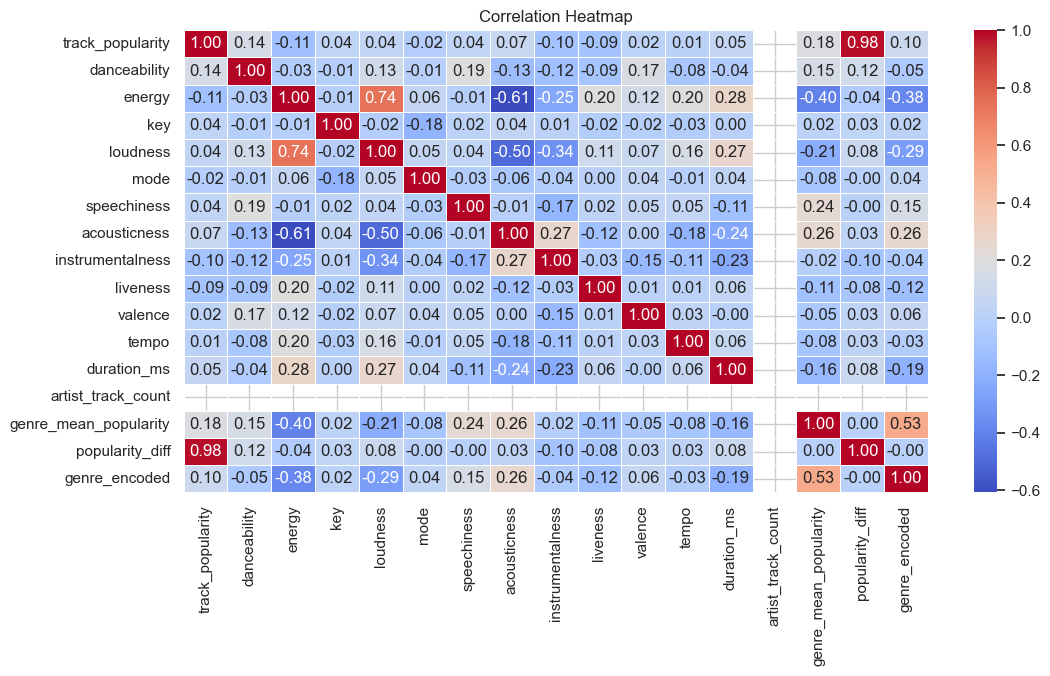

In [45]:
# 3. Correlation Heatmap
plt.figure(figsize=(12, 6))
# TODO: Тек сандық бағандарды таңдап, correlation matrix жасаңыз
df_numeric = df_cleaned.select_dtypes(include=['int64', 'float64'])

correlation_matrix = df_numeric.corr()
# TODO: sns.heatmap арқылы салыңыз
sns.heatmap(data = correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()